In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    return x * (1 - x)

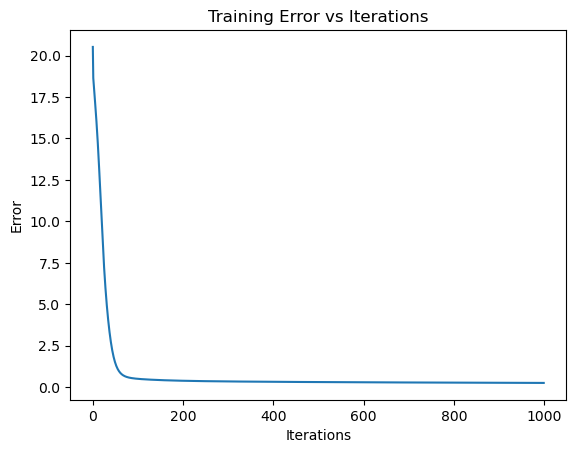

In [4]:
np.random.seed(42)
MT = 100
Q = 10
H = 5

true_positions = np.random.uniform(0, 100, (MT, 2))
trajectory_points = np.random.uniform(0, 100, (Q, 2))
distances = np.linalg.norm(trajectory_points[:, np.newaxis, :] - true_positions, axis=2)

input_data = distances / np.max(distances)
output_data = true_positions / 100

U = np.random.uniform(-0.5, 0.5, (H, Q))
V = np.random.uniform(-0.5, 0.5, (2, H))

learning_rate = 0.1
max_iterations = 1000
tolerance = 1e-4

errors = []
for iteration in range(max_iterations):
    total_error = 0
    for i in range(MT):
        R = input_data[:, i]
        Z = sigmoid(np.dot(U, R))
        Y = np.dot(V, Z)
        E = output_data[i] - Y
        total_error += np.sum(E ** 2)
        delta_output = E * sigmoid_derivative(Y)
        delta_hidden = np.dot(V.T, delta_output) * sigmoid_derivative(Z)
        V += learning_rate * np.outer(delta_output, Z)
        U += learning_rate * np.outer(delta_hidden, R)
    errors.append(total_error)
    if total_error < tolerance:
        break

plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Training Error vs Iterations")
plt.show()

In [5]:
new_sample = np.random.uniform(0, 100, 2)
new_distances = np.linalg.norm(trajectory_points - new_sample, axis=1) / np.max(distances)
new_Z = sigmoid(np.dot(U, new_distances))
predicted_position = np.dot(V, new_Z) * 100

print("True position:", new_sample)
print("Predicted position:", predicted_position)


True position: [89.00053418 33.79951569]
Predicted position: [86.46011111 34.28155066]
